# Customer Personality Analysis

## 1. Business Understanding
Customer Personality Analysis is a detailed analysis of a company's ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors, and concerns of different types of customers. This analysis aims to segment customers based on demographics, spending behavior, and campaign responses to optimize marketing strategies.

## 2. Data Understanding
We start by loading and inspecting the dataset.


In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import geopandas as gpd
import folium

import warnings
warnings.filterwarnings('ignore')

In [73]:
# Load the dataset
file_path = 'Data/marketing_campaign.csv'
df = pd.read_csv(file_path, delimiter='\t')

# Initial Data Inspection
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [74]:
df = df.drop("ID", axis=1)

In [75]:
df.shape

(2240, 28)

In [76]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [77]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## 3. Data Preparation
### Data Cleaning and Feature Engineering
We clean the data, handle missing values, check for illogical values, handle outliers, and create new features for analysis.


In [78]:
# Fill missing income values with the median income
median_income = df['Income'].median()
df['Income'].fillna(median_income, inplace=True)

# Calculate total spending and purchases
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Total_Purchases'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Create high/low spending feature
spending_threshold = df['Total_Spending'].median()
df['High_Spender'] = (df['Total_Spending'] > spending_threshold).astype(int)
# Create high/low purchase frequency feature
purchase_threshold = df['Total_Purchases'].median()
df['High_Purchase_Frequency'] = (df['Total_Purchases'] > purchase_threshold).astype(int)

In [79]:
# Convert 'Dt_Customer' to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Age Calculation
current_year = 2024
df['Age'] = current_year - df['Year_Birth']
# Create age groups
bins = [0 , 30, 40, 50, 60, 70, 100]
labels = ['<30', '30-40', '40-50', '50-60', '60-70', '70+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


In [80]:
# Convert categorical variables to numerical using one-hot encoding
categorical_columns = ['Education', 'Marital_Status', 'Age_Group']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [81]:
# Check for missing values in the entire DataFrame
missing_values = df.isna().sum()
print(missing_values)

Year_Birth                 0
Income                     0
Kidhome                    0
Teenhome                   0
Dt_Customer                0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Total_Spending             0
Total_Purchases            0
High_Spender               0
High_Purchase_Frequency    0
Age                        0
Education_Basic            0
Education_Graduation       0
Education_Master           0
Education_PhD 

In [82]:
# Fill missing values if any (e.g., with median for numerical columns)
df.fillna(df.median(), inplace=True)

### Handling Outliers
We will identify and handle outliers in the dataset.


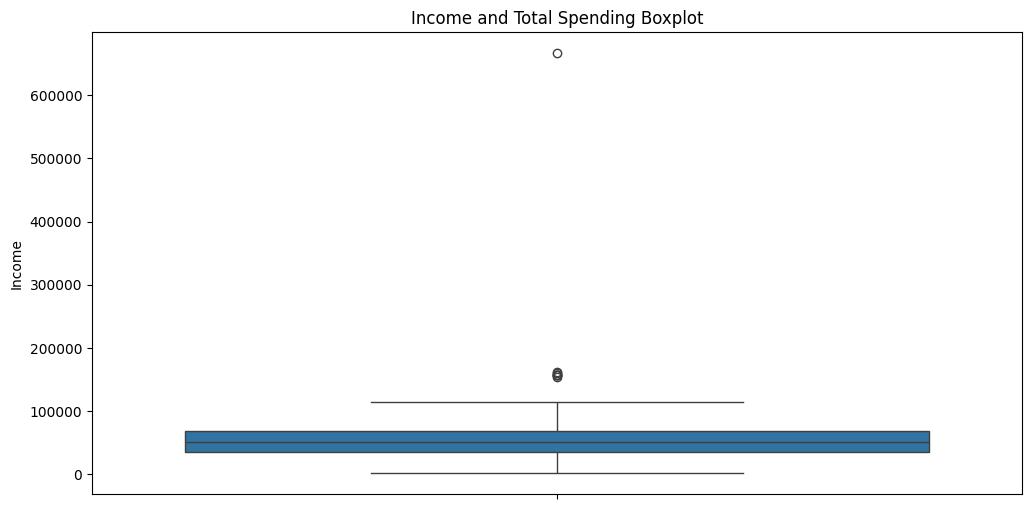

In [83]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df['Income'])
plt.title('Income and Total Spending Boxplot')
plt.show()

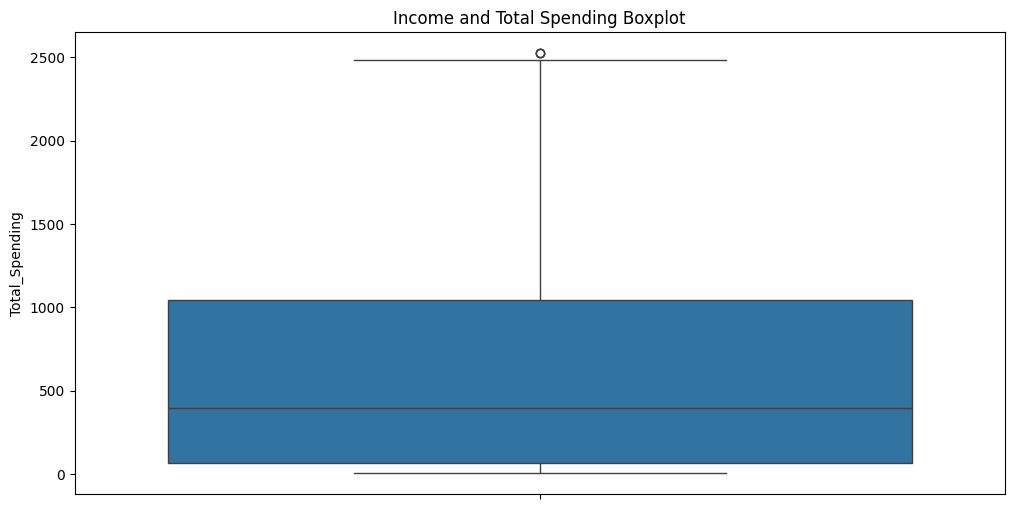

In [84]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df['Total_Spending'])
plt.title('Income and Total Spending Boxplot')
plt.show()

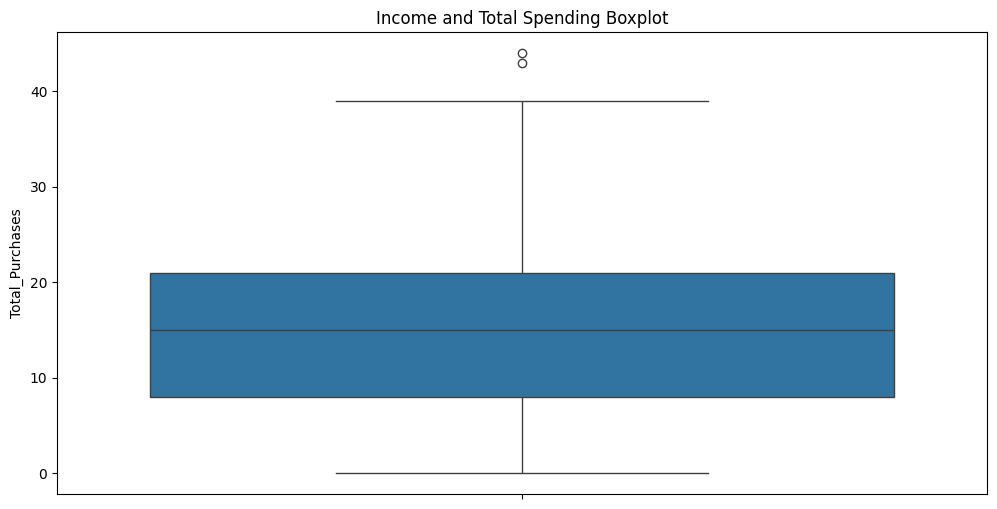

In [85]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df['Total_Purchases'])
plt.title('Income and Total Spending Boxplot')
plt.show()

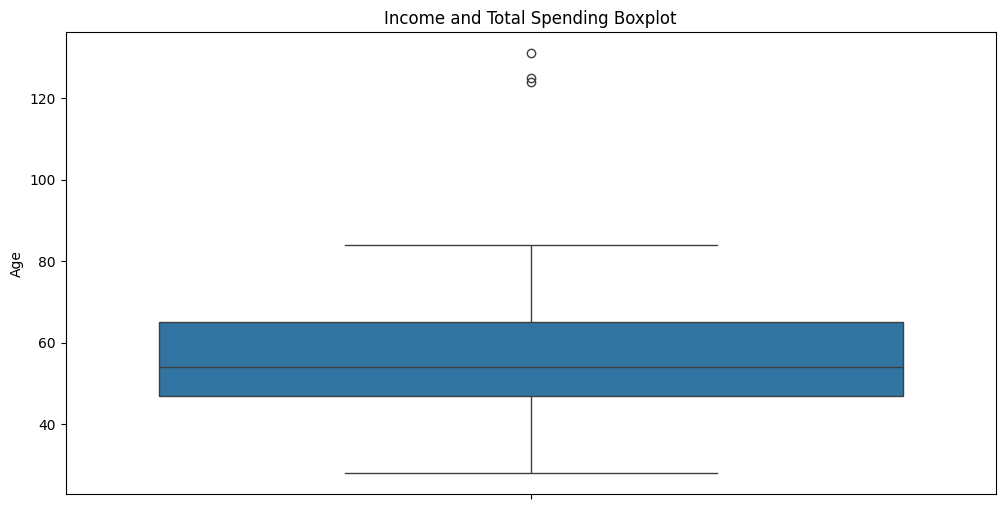

In [86]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df['Age'])
plt.title('Income and Total Spending Boxplot')
plt.show()

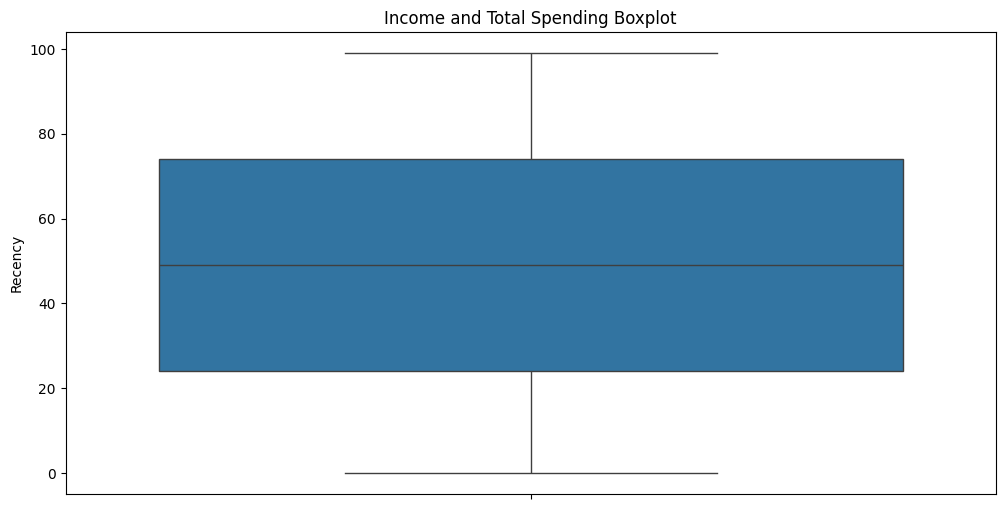

In [87]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df['Recency'])
plt.title('Income and Total Spending Boxplot')
plt.show()

In [88]:
# Handling Outliers
# Define a function to identify outliers based on the IQR method
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identify outliers in relevant numerical columns
outliers_income = identify_outliers(df, 'Income')
outliers_total_spending = identify_outliers(df, 'Total_Spending')
outliers_total_purchases = identify_outliers(df, 'Total_Purchases')
outliers_recency = identify_outliers(df, 'Recency')
outliers_Age= identify_outliers(df, 'Age')
# Print the number of outliers in each column
print(f"Number of outliers in Income: {len(outliers_income)}")
print(f"Number of outliers in Total Spending: {len(outliers_total_spending)}")
print(f"Number of outliers in Total Purchases: {len(outliers_total_purchases)}")
print(f"Number of outliers in Recency: {len(outliers_recency)}")
print(f"Number of outliers in Age: {len(outliers_Age)}")

# Remove outliers from the dataset
df = df[~df.index.isin(outliers_income.index)]
df = df[~df.index.isin(outliers_total_spending.index)]
df = df[~df.index.isin(outliers_total_purchases.index)]
df = df[~df.index.isin(outliers_recency.index)]
df = df[~df.index.isin(outliers_Age.index)]

Number of outliers in Income: 8
Number of outliers in Total Spending: 3
Number of outliers in Total Purchases: 2
Number of outliers in Recency: 0
Number of outliers in Age: 3


## 4. Exploratory Data Analysis (EDA)
### Correlation Analysis
Analyze the correlations between different numerical features to identify potential relationships.


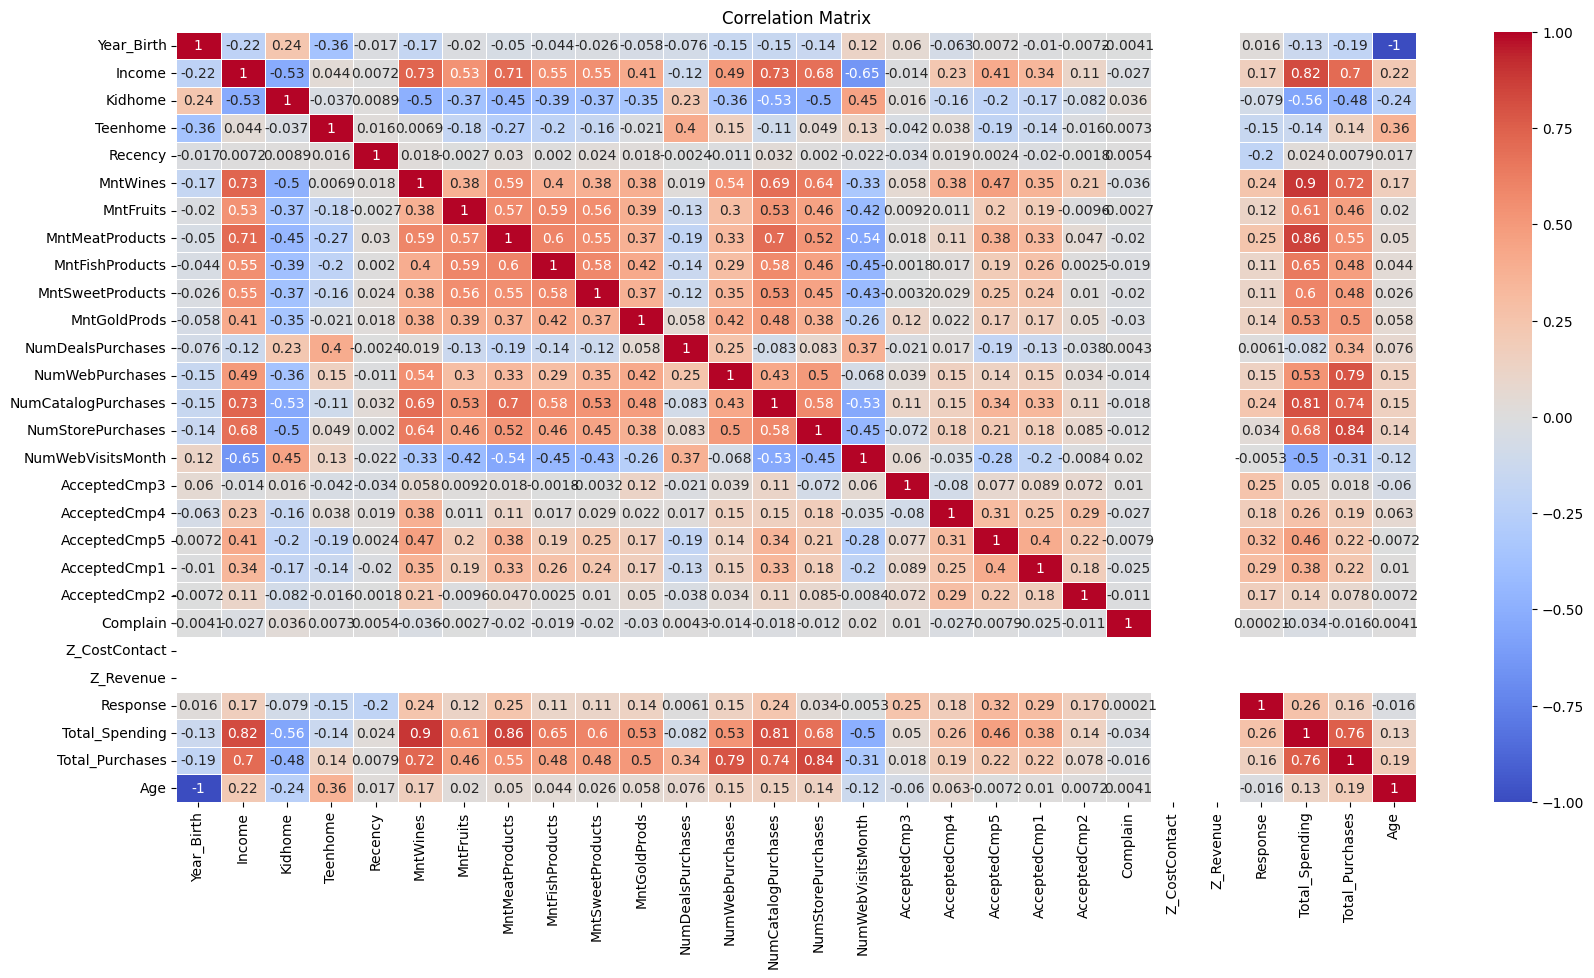

In [89]:
# Correlation Analysis (excluding non-numerical columns)
numerical_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(20, 10))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



### Demographic Analysis
We will analyze the age distribution, education level, and marital status of the customers.

In [90]:
# Demographic Analysis
# Age distribution and groups
age_distribution = df['Age'].describe()
age_group_counts = df.filter(like='Age_Group').sum()

print("Age Distribution:\n", age_distribution)
print("\nAge Group Counts:\n", age_group_counts)


Age Distribution:
 count    2225.000000
mean       55.144270
std        11.690145
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max        84.000000
Name: Age, dtype: float64

Age Group Counts:
 Age_Group_30-40    211
Age_Group_40-50    551
Age_Group_50-60    674
Age_Group_60-70    467
Age_Group_70+      315
dtype: int64


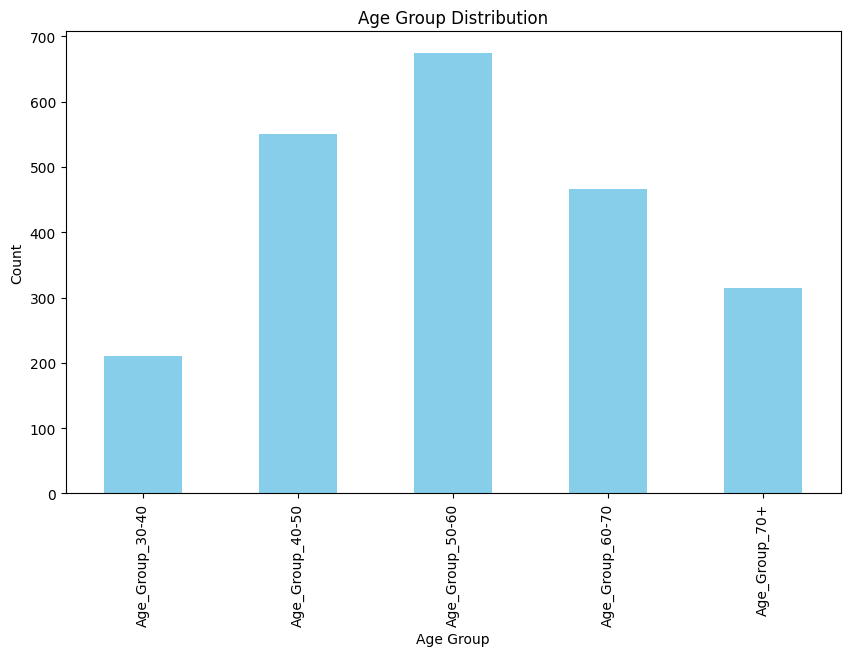

In [91]:
# Visualize the Age Group Distribution
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

### Education and Marital Status Distribution


In [92]:
# Education and marital status distributions
education_counts = df.filter(like='Education').sum()
marital_status_counts = df.filter(like='Marital_Status').sum()

print("\nEducation Level Counts:\n", education_counts)
print("\nMarital Status Counts:\n", marital_status_counts)


Education Level Counts:
 Education_Basic           54
Education_Graduation    1122
Education_Master         367
Education_PhD            481
dtype: int64

Marital Status Counts:
 Marital_Status_Alone         3
Marital_Status_Divorced    230
Marital_Status_Married     860
Marital_Status_Single      477
Marital_Status_Together    574
Marital_Status_Widow        77
Marital_Status_YOLO          2
dtype: int64


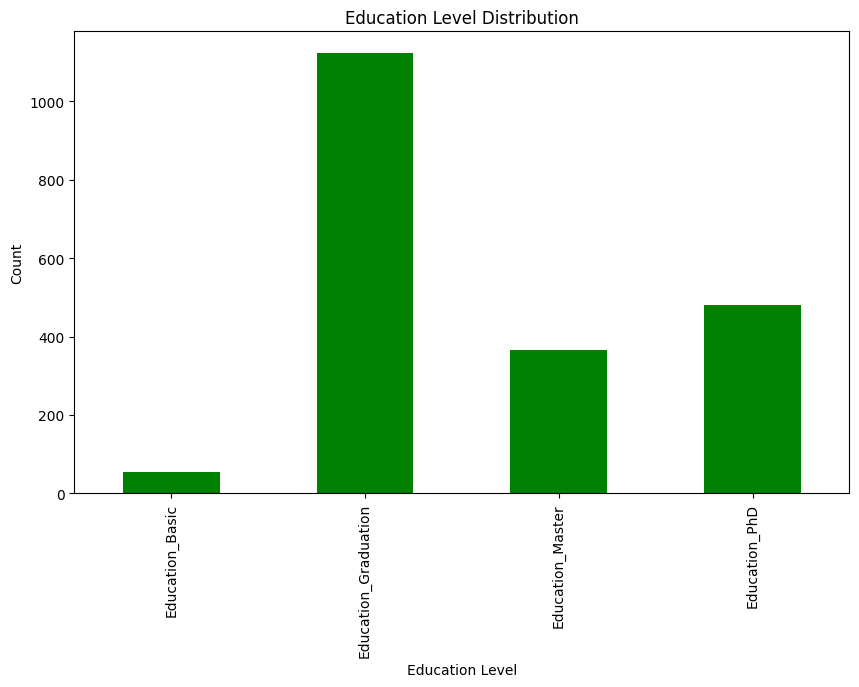

In [93]:
# Visualize the Education Level Distribution
plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar', color='green')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

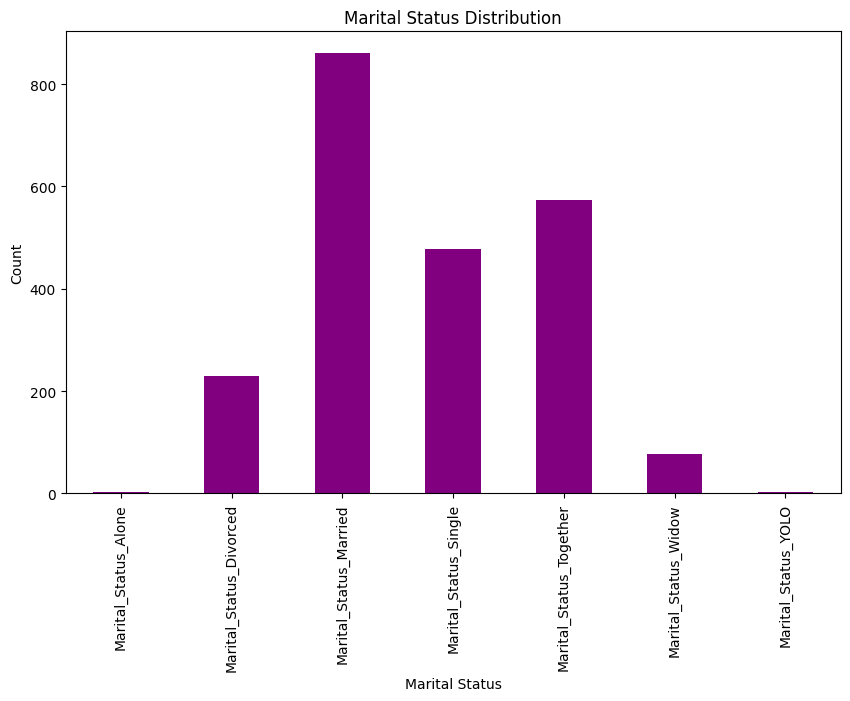

In [94]:
# Visualize the Marital Status Distribution
plt.figure(figsize=(10, 6))
marital_status_counts.plot(kind='bar', color='purple')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

### Spending Behavior Analysis
We will analyze the total spending distribution and spending by category, age group, and marital status.


In [95]:
# Spending by category
spending_by_category = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

print("\nSpending by Category:\n", spending_by_category)


Spending by Category:
 MntWines            676254
MntFruits            58318
MntMeatProducts     364048
MntFishProducts      83619
MntSweetProducts     60106
MntGoldProds         98102
dtype: int64


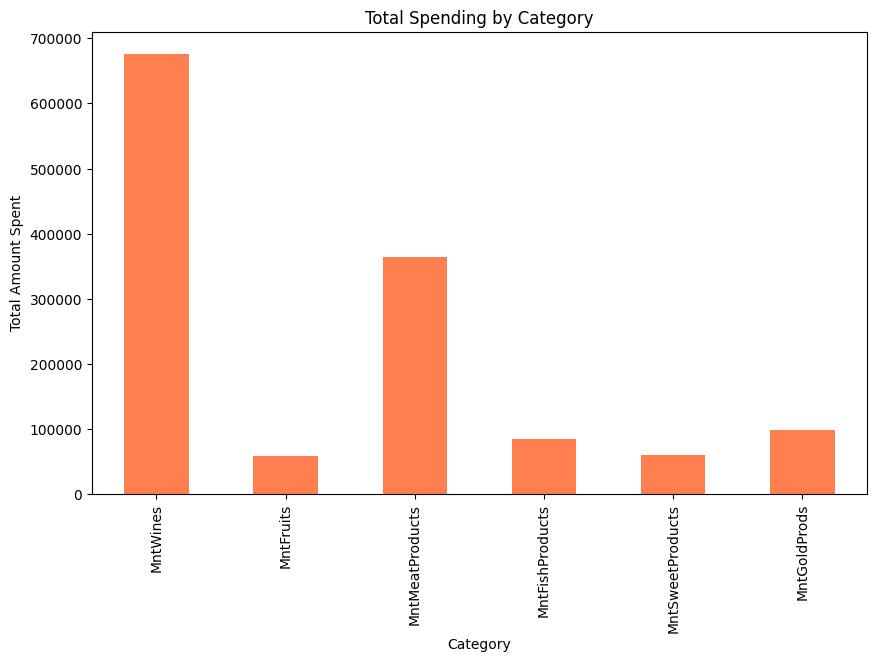

In [96]:
# Visualize the Spending by Category
plt.figure(figsize=(10, 6))
spending_by_category.plot(kind='bar', color='coral')
plt.title('Total Spending by Category')
plt.xlabel('Category')
plt.ylabel('Total Amount Spent')
plt.show()

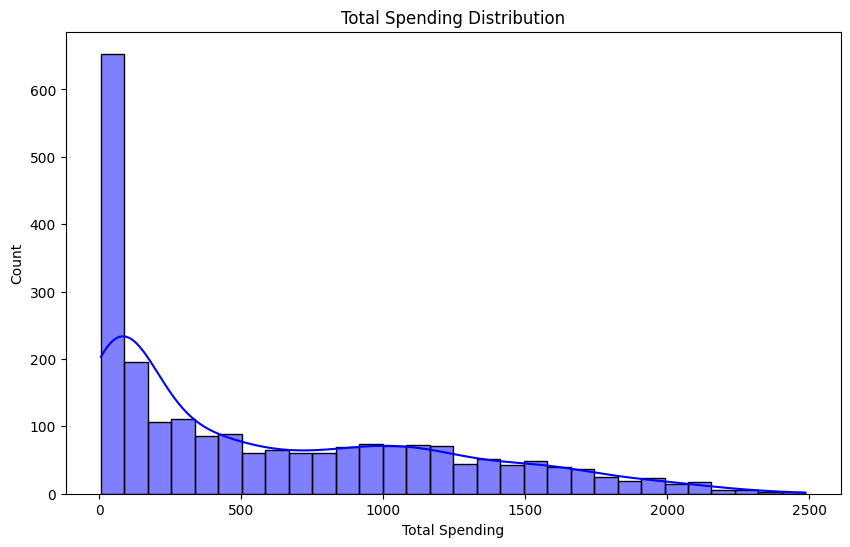

In [97]:
# Total Spending Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Spending'], kde=True, bins=30, color='blue')
plt.title('Total Spending Distribution')
plt.xlabel('Total Spending')
plt.ylabel('Count')
plt.show()

In [103]:
# Calculate total spending by age group
spending_by_age_group = df.filter(like='Age_Group').mul(df['Total_Spending'], axis=0).mean()

print("\nSpending by Age Group:\n",spending_by_age_group)



Spending by Age Group:
 Age_Group_30-40     55.327640
Age_Group_40-50    127.669213
Age_Group_50-60    167.681348
Age_Group_60-70    143.579775
Age_Group_70+      106.417528
dtype: float64


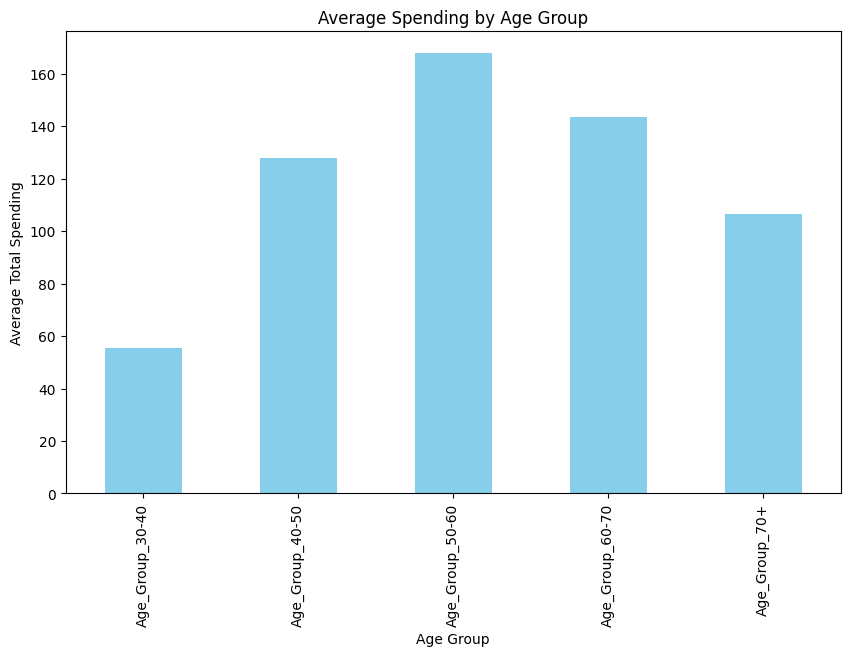

In [99]:
# Visualize the spending behavior by age group
plt.figure(figsize=(10, 6))
spending_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Average Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Total Spending')
plt.show()


Spending by Marital Status:
 Marital_Status_Alone         0.346067
Marital_Status_Divorced     63.638202
Marital_Status_Married     227.141573
Marital_Status_Single      128.557303
Marital_Status_Together    155.743820
Marital_Status_Widow        25.568090
Marital_Status_YOLO          0.381124
dtype: float64


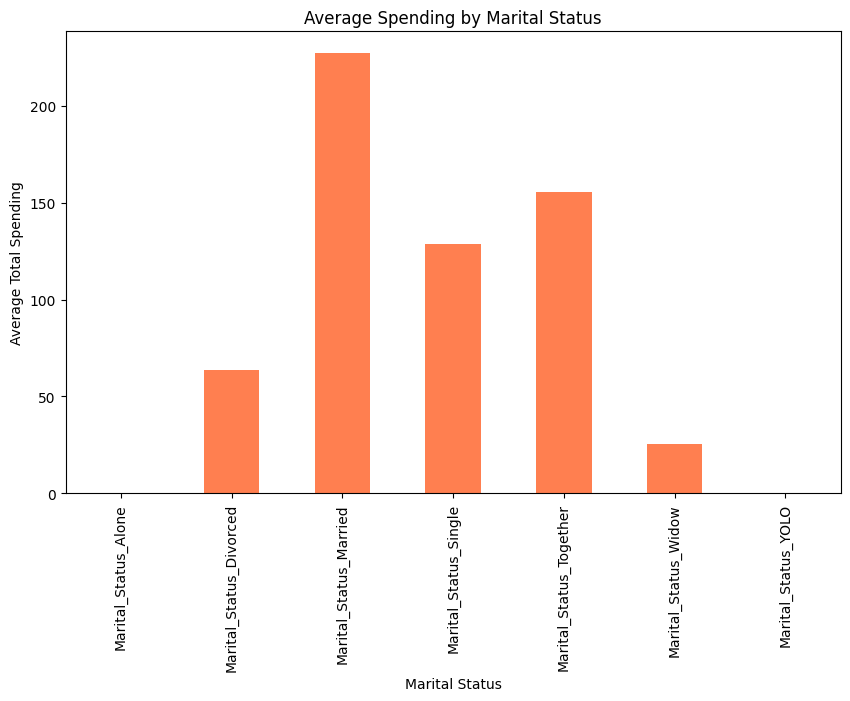

In [104]:
# Calculate average spending by marital status
spending_by_marital_status = df.filter(like='Marital_Status').mul(df['Total_Spending'], axis=0).mean()

print("\nSpending by Marital Status:\n", spending_by_marital_status)

# Visualize the spending behavior by marital status
plt.figure(figsize=(10, 6))
spending_by_marital_status.plot(kind='bar', color='coral')
plt.title('Average Spending by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Total Spending')
plt.show()

### Spending Patterns by Education Level
Analyze and visualize the spending behavior based on the education level of customers.



Spending by Education Level:
 Education_Basic           1.985169
Education_Graduation    311.269213
Education_Master         99.438202
Education_PhD           144.493483
dtype: float64


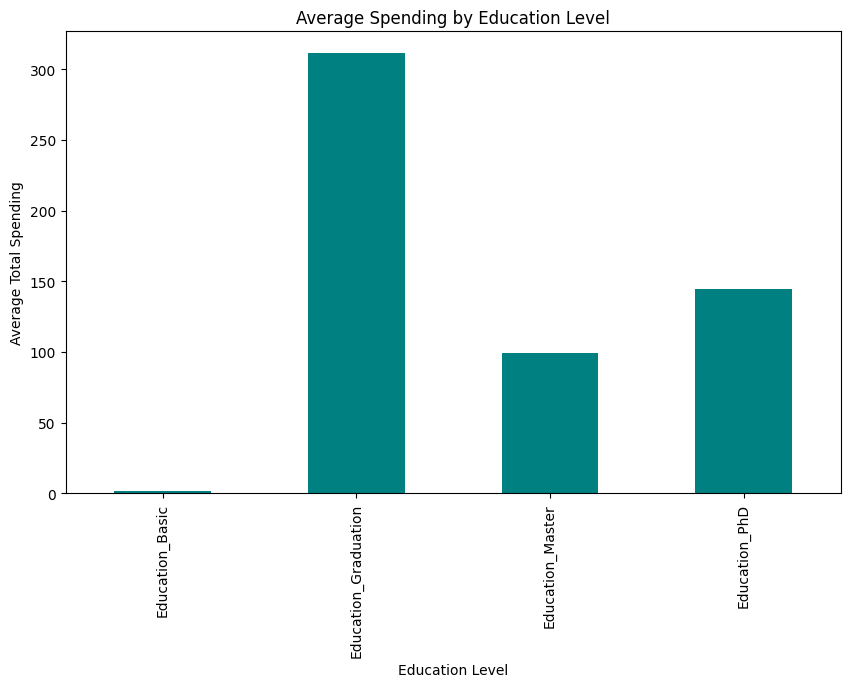

In [108]:
# Spending by Education Level
# Spending by Education Level
spending_by_education = df.filter(like='Education').mul(df['Total_Spending'], axis=0).mean()

print("\nSpending by Education Level:\n", spending_by_education)


# Visualize the spending behavior by education level
plt.figure(figsize=(10, 6))
spending_by_education.plot(kind='bar', color='teal')
plt.title('Average Spending by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Total Spending')
plt.show()


### Customer Segmentation
Perform clustering to segment customers based on their demographics and spending behavior.


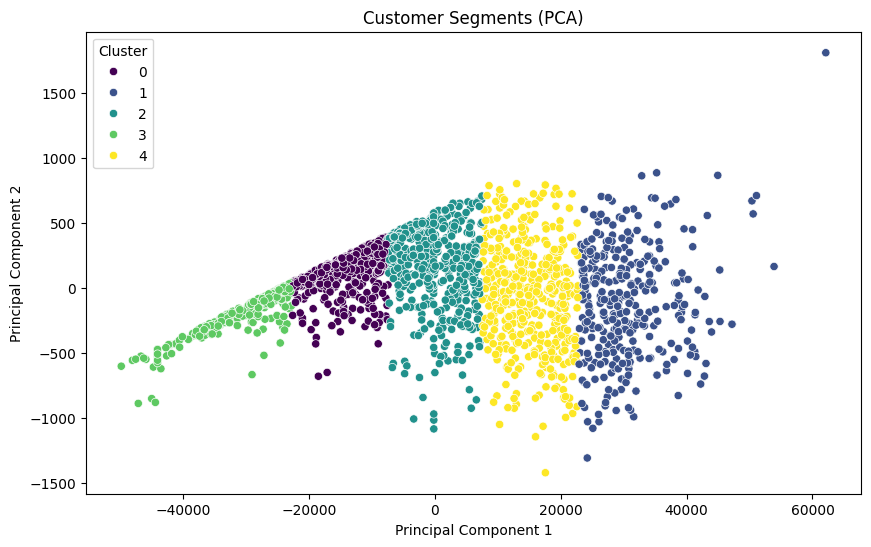

In [110]:
# Customer Segmentation
clustering_features = ['Income', 'Recency', 'Total_Spending', 'Total_Purchases', 'Kidhome', 'Teenhome', 'High_Spender', 'High_Purchase_Frequency']

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[clustering_features])

# Visualize the clusters using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df[clustering_features])
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('Customer Segments (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


AcceptedCmp1     6.426966
AcceptedCmp2     1.348315
AcceptedCmp3     7.280899
AcceptedCmp4     7.505618
AcceptedCmp5     7.146067
Response        14.921348
dtype: float64


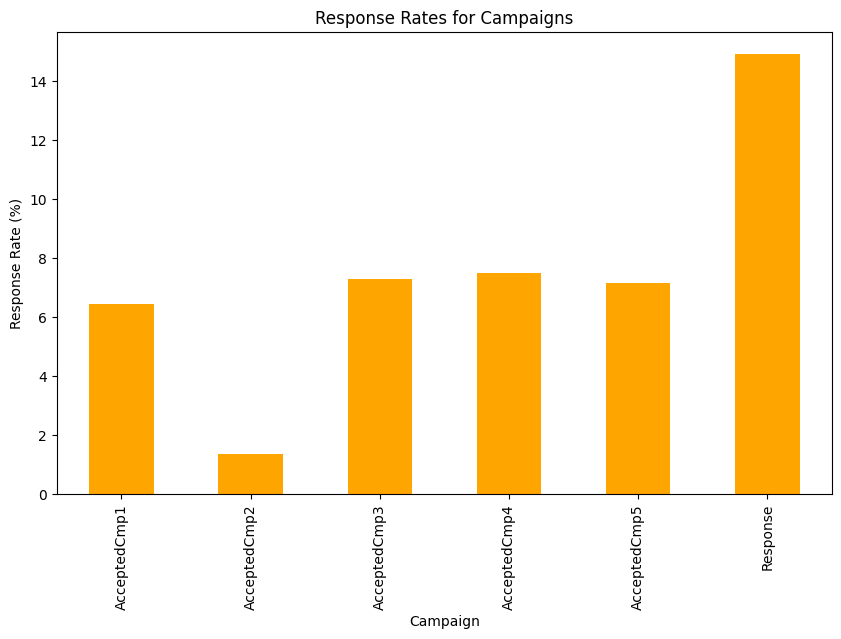

In [111]:
# Campaign Effectiveness Analysis
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
response_rates = df[campaign_columns].mean() * 100
print(response_rates)

# Visualize the response rates
plt.figure(figsize=(10, 6))
response_rates.plot(kind='bar', color='orange')
plt.title('Response Rates for Campaigns')
plt.xlabel('Campaign')
plt.ylabel('Response Rate (%)')
plt.show()


In [112]:
# Churn Prediction
# Assume that customers who haven't made a purchase in the last 60 days are potential churners
potential_churners = df[df['Recency'] > 60]
print(f"Number of potential churners: {len(potential_churners)}")

Number of potential churners: 857


In [113]:
#Analyze characteristics of potential churners
churner_demographics = potential_churners[['Age', 'Income', 'Marital_Status_Divorced', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow']].describe()
print(churner_demographics)

# Product Preference Analysis
# Top products analysis
top_products = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
print(top_products)

              Age         Income
count  857.000000     857.000000
mean    55.238040   51872.708285
std     11.605038   20436.157270
min     28.000000    1730.000000
25%     47.000000   35893.000000
50%     54.000000   51381.500000
75%     65.000000   67546.000000
max     84.000000  101970.000000
MntWines            676254
MntFruits            58318
MntMeatProducts     364048
MntFishProducts      83619
MntSweetProducts     60106
MntGoldProds         98102
dtype: int64


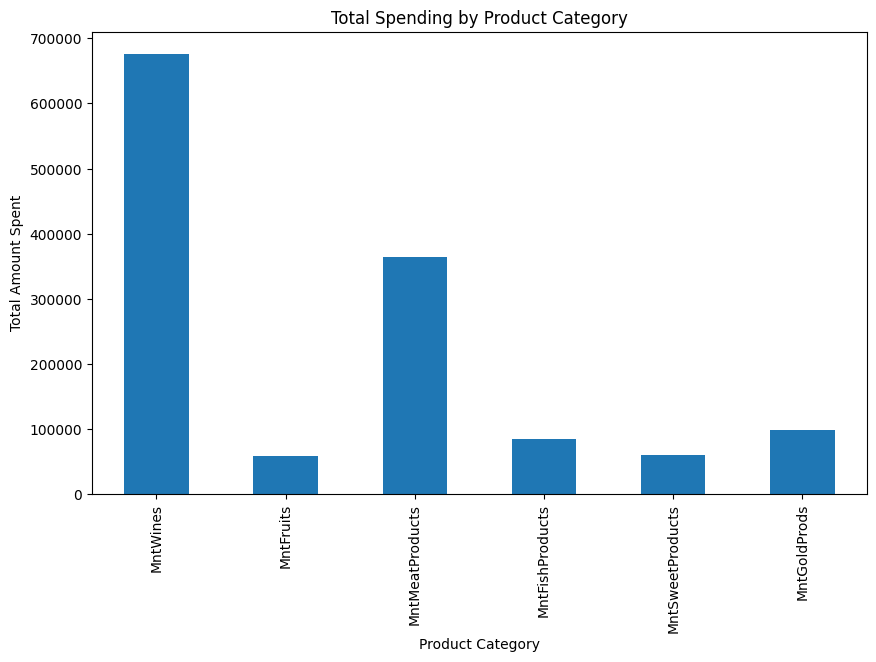

In [115]:
# Visualize the top products
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar')
plt.title('Total Spending by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount Spent')
plt.show()


In [116]:
# Cross-sell analysis (example)
cross_sell_matrix = df[['MntWines', 'MntMeatProducts']].corr()
print(cross_sell_matrix)

                 MntWines  MntMeatProducts
MntWines         1.000000         0.591416
MntMeatProducts  0.591416         1.000000


In [117]:
# Time Series Analysis
# Extract year and month from the customer joining date
df['Year'] = df['Dt_Customer'].dt.year
df['Month'] = df['Dt_Customer'].dt.month


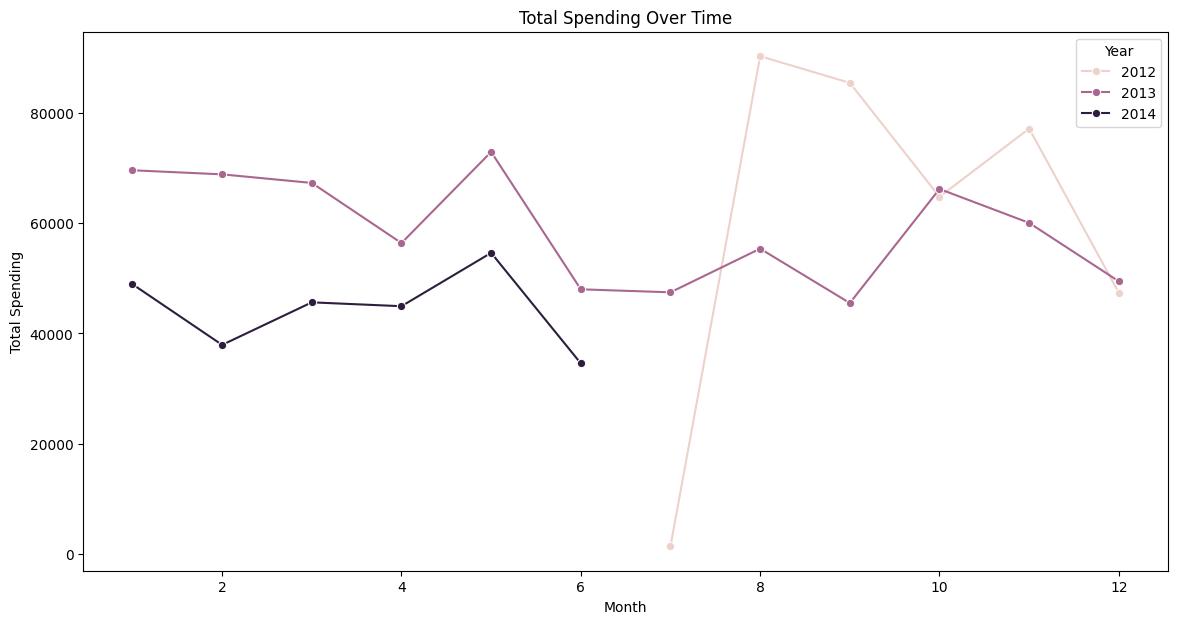

In [118]:
# Analyze spending over time
spending_over_time = df.groupby(['Year', 'Month'])['Total_Spending'].sum().reset_index()

# Visualize spending over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=spending_over_time, x='Month', y='Total_Spending', hue='Year', marker='o')
plt.title('Total Spending Over Time')
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.show()

# Summary of Findings

## Demographic Insights
- **Age Distribution**: The majority of customers are aged between 50-60, followed by 40-50 and 60-70.
- **Education Levels**: Most customers have completed graduation, with a significant number holding PhDs and Master's degrees.
- **Marital Status**: The marital status is predominantly married, with a substantial number of customers being together or single.

## Spending Behavior
- **Category Spending**: The highest spending is on wines, followed by meat products. Spending on gold products, fish products, sweets, and fruits is considerably lower.
- **Age and Spending**: Older customers tend to spend more on average than younger customers.
- **Marital Status and Spending**: Customers in the 'Widow' category show notable spending, while those in 'YOLO' and 'Alone' categories show lower spending.

## Purchase Channels
- **Preferred Channels**: Most purchases are made in-store, followed by web and catalog purchases. Purchases made through deals are the least frequent.

## Campaign Responses
- **Overall Response Rate**: The overall response rate to campaigns is relatively low at 14.91%.
- **Campaign Effectiveness**: Campaign 2 has the lowest response rate, while Campaigns 3, 4, and 5 have the highest response rates, each around 7.28%.

## Correlation Analysis
- **Spending Patterns**: There are notable correlations between different spending categories, which can help in understanding customer spending patterns.

## Spending by Education
- **Education and Spending**: Spending patterns vary based on education level, with higher spending observed in customers with higher education levels.

## Customer Segmentation
- **Segment Characteristics**: Customers can be segmented into distinct groups based on their demographics and spending behavior, providing a basis for targeted marketing strategies.

## Campaign Effectiveness
- **Tailored Strategies**: Response rates vary across different campaigns, suggesting the need for tailored marketing strategies.

## Churn Prediction
- **Identifying Churners**: Potential churners have been identified, and their demographics analyzed to understand the factors contributing to their inactivity.

## Product Preference Analysis
- **Top Products**: Wines and meat products are the most popular categories. Cross-sell opportunities exist between products frequently bought together.

## Time Series Analysis
- **Spending Trends**: Spending behavior varies over time, with notable trends that can help in planning marketing campaigns and inventory management.